In [2]:
import pip
import torch
from torch.nn import functional as f
from torch import optim,nn,autograd
from torch.autograd import Variable
from torch.utils import data
import numpy as np
import pandas as pd
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from MulticoreTSNE import MulticoreTSNE as TSNE

/home/phoenix/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
songs_df = pd.read_csv("../../SongApp.csv",header=-1,)

In [4]:
song_app = songs_df
song_app.head()

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
0,NaN,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,0.0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,1.0,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2.0,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,3.0,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [5]:
# clean data
song_app = song_app.dropna()
song_app.__delitem__(0)
num_columns = song_app.columns.shape[0]
columns = list(range(num_columns - 1))
columns = ['labels'] + list(map(str,columns))
song_app.columns = columns
song_app.head()

,labels,0,1,2,3,4,5,6,7,8,...,80,81,82,83,84,85,86,87,88,89
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
5,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


In [12]:
df = song_app.sample(50000)

In [13]:
# split training and test set
train, test = train_test_split(df, train_size=0.5, random_state=90)
y_train = train['labels']
X_train = train.drop('labels', axis=1)
y_test = test['labels']
X_test = test.drop('labels', axis=1)

In [16]:
# scale features
scaler = preprocessing.StandardScaler().fit(X_train)
Xtrain_scaled = scaler.transform(X_train)

In [27]:
#Random Forest Classifier feature importances
rf = RandomForestClassifier(n_estimators=8, n_jobs=6)
rf.fit(Xtrain_scaled, y_train)
headers = ["name", "score"]
values = sorted(zip(columns[1:], rf.feature_importances_), key=lambda x: x[1] * -1)
print(tabulate(values, headers, tablefmt="plain"))

  name       score
     0  0.015493
     1  0.0130376
     5  0.0123118
     2  0.0122589
    42  0.0121969
     6  0.0121238
    11  0.0120173
    25  0.0118718
    87  0.0118151
    10  0.011811
    58  0.0117704
    61  0.0117672
    16  0.011728
    82  0.0116838
    40  0.0116179
    72  0.0115576
    39  0.0115483
    73  0.0115461
    13  0.011537
    63  0.0114649
    65  0.011431
    76  0.0114092
    36  0.0113627
    47  0.0113594
    79  0.0113301
    49  0.0113193
    34  0.0113053
    27  0.0113015
    60  0.0112978
     8  0.0112729
    84  0.0112722
    78  0.0112586
    24  0.0112585
    45  0.0112525
    50  0.0112028
    69  0.0111849
    62  0.0111846
    19  0.01117
    70  0.0111408
    77  0.0111249
    38  0.0111185
    74  0.0110994
     7  0.0110911
     4  0.0110821
    75  0.0110812
    56  0.0110704
    67  0.0110653
    52  0.0110426
    37  0.0110084
    33  0.0109717
    28  0.0109635
    32  0.0109484
    85  0.0109034
    54  0.0108992
    53  0.010884

In [94]:
# prise en compte des années les plus représentatives seulement
df_songs = songs_df.sort_values(by=1)
df_songs = df_songs[df_songs[1] >= 1920] 
df_songs = df_songs[df_songs[1] <= 2009]
df_songs = df_songs.sample(frac=1)
del df_songs[0]
labels = df_songs[1]
del df_songs[1]
df_songs.head()

,2,3,4,5,6,7,8,9,10,11,...,82,83,84,85,86,87,88,89,90,91
211948,49.31678,8.90792,10.79202,-11.25548,-23.78856,-13.10688,-14.97425,-5.46159,8.64372,5.16658,...,-24.37455,9.04900,36.15939,34.42251,11.14674,72.88799,-78.30951,9.04472,35.37802,-2.15967
241411,45.99484,10.66225,27.73484,5.16397,6.86747,-13.46788,5.58754,-2.11410,4.92808,-1.12072,...,23.18791,-129.55770,-60.41655,-30.71042,7.06487,41.23794,-39.44039,0.80892,-42.51412,-35.21970
458077,49.58284,36.34060,25.41108,-10.46625,-1.91666,-8.79836,-1.38140,-2.44595,8.59375,-3.96856,...,2.24042,-111.38283,-100.76055,4.76407,12.87419,-4.12091,-3.43718,10.76154,84.16407,2.17093
296348,47.51117,22.76374,5.08034,13.61224,-16.49713,1.24697,12.13898,5.43635,-5.91217,1.81163,...,-2.86272,-31.33147,107.93055,248.14807,5.69274,-25.50673,2.46419,-5.79183,20.75212,-8.59512
297628,37.58004,-13.79163,-60.02953,69.34414,9.28633,18.02850,8.41692,5.41346,1.76971,2.92970,...,-0.03000,-93.97462,51.66951,91.87024,-4.08822,906.75085,215.47316,36.93456,10.02236,21.98099


In [95]:
# count by label
from collections import Counter
c = Counter(labels)
c

Counter({1922: 6,
         1924: 5,
         1925: 7,
         1926: 19,
         1927: 40,
         1928: 48,
         1929: 79,
         1930: 38,
         1931: 31,
         1932: 11,
         1933: 6,
         1934: 28,
         1935: 24,
         1936: 22,
         1937: 25,
         1938: 19,
         1939: 35,
         1940: 14,
         1941: 31,
         1942: 21,
         1943: 13,
         1944: 14,
         1945: 27,
         1946: 29,
         1947: 55,
         1948: 38,
         1949: 53,
         1950: 58,
         1951: 62,
         1952: 65,
         1953: 121,
         1954: 108,
         1955: 253,
         1956: 535,
         1957: 559,
         1958: 522,
         1959: 544,
         1960: 398,
         1961: 521,
         1962: 581,
         1963: 867,
         1964: 850,
         1965: 996,
         1966: 1202,
         1967: 1517,
         1968: 1655,
         1969: 1986,
         1970: 2124,
         1971: 1866,
         1972: 2078,
         1973: 2325,
      

In [96]:
# labels size
len(set(labels))

87

In [113]:
# pca
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
results_pca = pca.fit_transform(df_songs)

In [114]:
print(sum(pca.explained_variance_ratio_))

0.941700641214


In [115]:
#least squares method linear regression
from sklearn.linear_model import LinearRegression
X = df_songs
lr = LinearRegression()
lr.fit(X, labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [117]:
print('Estimated intercept coefficient :', lr.intercept_)

Estimated intercept coefficient : 1951.32917306


In [119]:
print('Number of coefficients', len(lr.coef_))

Number of coefficients 90


In [120]:
# correlation between features and labels
model = pd.DataFrame(list(zip(X.columns, lr.coef_)), columns = ['features', 'estimated coefficients'])
model.sort_values(by='estimated coefficients',ascending=False)

,features,estimated coefficients
0,2,0.866756
12,14,0.046742
84,86,0.028015
9,11,0.022500
75,77,0.015188
22,24,0.007666
45,47,0.006905
3,5,0.005117
73,75,0.004372
74,76,0.003033


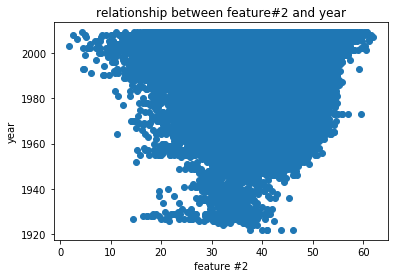

In [121]:
import matplotlib.pyplot as plt
plt.scatter(X[2], labels)
plt.xlabel('feature #2')
plt.ylabel('year')
plt.title('relationship between feature#2 and year')
plt.figure(1, figsize=(16, 16))
plt.show()

In [122]:
# show the 5 first years predicted
lr.predict(X)[0:5]

array([ 2001.84776108,  1997.28398842,  1997.65740608,  2005.08945523,
        2000.77790415])

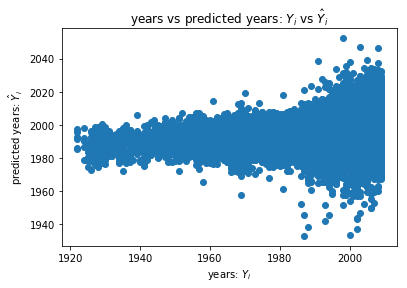

In [123]:
plt.scatter(labels, lr.predict(X))
plt.xlabel('years: $Y_i$')
plt.ylabel('predicted years: $\hat{Y}_i$')
plt.title('years vs predicted years: $Y_i$ vs $\hat{Y}_i$')
plt.figure(1, figsize=(16, 16))
plt.show()

In [124]:
# mean squared error
mse = np.mean((labels - lr.predict(X)) ** 2)
print('mse :', mse)

mse : 91.20941549824106


In [125]:
# split into training and test data
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, labels, test_size=0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(305085, 90)
(150267, 90)
(305085,)
(150267,)


In [126]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
pred_train = lin_reg.predict(X_train)
pred_test = lin_reg.predict(X_test)

In [128]:
print('fit a model X_train and calculate MSE with Y_train:', np.mean(Y_train-pred_train) ** 2)
print('fit a model X_train and calculate MSE with X_test:', np.mean(Y_test-pred_test) ** 2)

fit a model X_train and calculate MSE with Y_train: 3.652326073773449e-26
fit a model X_train and calculate MSE with X_test: 5.326754777032009e-05


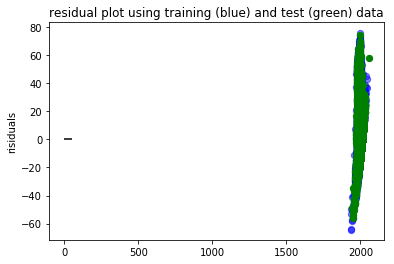

In [129]:
plt.scatter(pred_train, pred_train - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(pred_test, pred_test - Y_test, c='g', s=40)
plt.hlines(y=0, xmin=0, xmax=50)
plt.title('residual plot using training (blue) and test (green) data')
plt.ylabel('risiduals')
plt.show()